# Final homework

## References

* [Preprocessing and finding the barcode](https://pyimgsearch.com/2014/11/24/detecting-barcodes-imgs-python-opencv/)

* [Decoding the barcode](https://www.kaggle.com/code/rafunlearnhub/barcode-reading-from-scratch)

* [Recognizing one-dimensional barcode using OpenCV](https://opencv.org/recognizing-one-dimensional-barcode-using-opencv/)

## Load the img

First, load the img

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import pandas as pd
from PIL import Image

In [2]:
img_number = 3123931423032

img_path = 'images/' + str(img_number) + '.jpg'

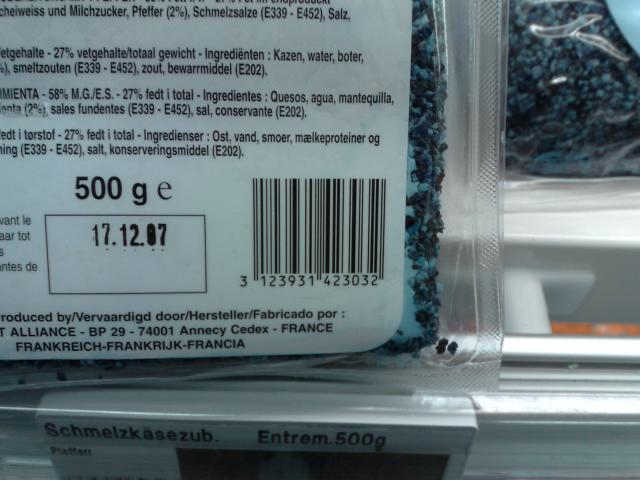

In [3]:
img = cv2.imread(img_path)
Image.fromarray(img)

## Pre-process the img

* Convert img to grayscale. 

* Compute the Scharr gradient magnitude representation of the imgs in both the x and y direction. 

* Subtract the y-gradient from the x-gradient.

* Blur an img using a 9 x 9 kernel and then threshold the img.

* Construct a closing rectangular kernel and apply it to the thresholded img.

* Perform a series of erosions and dilations to remove blobs.

In [4]:
scale_percent = 640/img.shape[1]       
width = int(img.shape[1] * scale_percent)
height = int(img.shape[0] * scale_percent)
dim = (width, height)
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [6]:
ddepth = cv2.cv.CV_32F if imutils.is_cv2() else cv2.CV_32F
gradX = cv2.Sobel(gray, ddepth=ddepth, dx=1, dy=0, ksize=-1)
gradY = cv2.Sobel(gray, ddepth=ddepth, dx=0, dy=1, ksize=-1)

In [7]:
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)

In [8]:
blurred = cv2.blur(gradient, (9, 9))
(_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)

In [9]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 10))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

In [10]:
closed = cv2.erode(closed, None, iterations = 4)
closed = cv2.dilate(closed, None, iterations = 4)

## Find the barcode

* Find the contours in the thresholded img.

* Sort the contours by their area, keeping only the largest one.

* Compute the rotated bounding box of the largest contour.

* ~~Draw a bounding box arounded the detected barcode and display the img.~~

* Crop the barcode from initial img.

In [11]:
cnts = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]

In [12]:
rect = cv2.minAreaRect(c)
box = cv2.cv.BoxPoints(rect) if imutils.is_cv2() else cv2.boxPoints(rect)
box = np.int0(box)

/tmp/ipykernel_11506/478297875.py:3: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


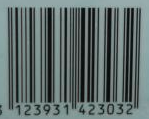

In [13]:
crop = img[(box[1][1] - 10):(box[3][1] + 10), (box[0][0] - 10):(box[2][0] + 10)]
Image.fromarray(crop)

In [14]:
cv2.imwrite('cropped_images/new_' + str(img_number) + '.jpg', crop)

False